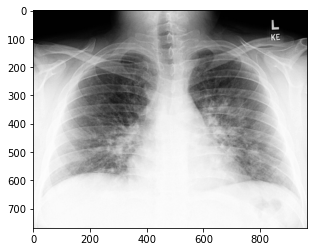

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

DATADIR = "D:/Datasets/covid/"
CATEGORIES = ["Covid", "Healthy"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to covid or healthy dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # only if colour is non essential, otherwise no need to make grayscale
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [40]:
print(img_array)

[[  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 [  1   1   1 ...   1   1   1]
 ...
 [198 198 197 ... 201 201 201]
 [197 197 197 ... 201 201 200]
 [197 196 196 ... 201 200 200]]


In [39]:
print(img_array.shape)

(768, 968)


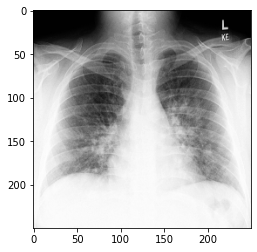

In [23]:
IMG_SIZE = 250
new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [25]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to covid or healthy dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE) # only if colour is non essential, otherwise no need to make grayscale
                new_array = cv2.resize(img_array,(IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except exception as e:
                pass # incase some images are just broken
            
create_training_data()

In [26]:
print(len(training_data))

4006


In [31]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
1
0
1
1
0


In [32]:
X = []
y = []

In [33]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # change the final 1 to a 3 if not working with grayscale

In [35]:
import pickle
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [36]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [37]:
X[1]

array([[[ 61],
        [ 62],
        [ 62],
        ...,
        [ 62],
        [ 62],
        [ 62]],

       [[ 62],
        [ 62],
        [ 62],
        ...,
        [ 62],
        [ 62],
        [ 62]],

       [[ 62],
        [ 62],
        [ 62],
        ...,
        [ 62],
        [ 62],
        [ 62]],

       ...,

       [[148],
        [153],
        [158],
        ...,
        [ 74],
        [ 64],
        [ 63]],

       [[148],
        [153],
        [157],
        ...,
        [ 72],
        [ 64],
        [ 63]],

       [[147],
        [153],
        [158],
        ...,
        [ 71],
        [ 64],
        [ 63]]], dtype=uint8)